In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [464]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [465]:
!ls

drive  sample_data


In [466]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [467]:
data = pd.read_csv('/content/drive/MyDrive/owid-covid-data(1).csv')
data.head()

iso_code continent  ... excess_mortality excess_mortality_cumulative_per_million
0      AFG      Asia  ...              NaN                                     NaN
1      AFG      Asia  ...              NaN                                     NaN
2      AFG      Asia  ...              NaN                                     NaN
3      AFG      Asia  ...              NaN                                     NaN
4      AFG      Asia  ...              NaN                                     NaN

[5 rows x 67 columns]

In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133596 entries, 0 to 133595
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    133596 non-null  object 
 1   continent                                   125070 non-null  object 
 2   location                                    133596 non-null  object 
 3   date                                        133596 non-null  object 
 4   total_cases                                 126238 non-null  float64
 5   new_cases                                   126236 non-null  float64
 6   new_cases_smoothed                          125193 non-null  float64
 7   total_deaths                                115089 non-null  float64
 8   new_deaths                                  115285 non-null  float64
 9   new_deaths_smoothed                         125193 non-null  float64
 

In [469]:
data.isna().sum()

iso_code                                        0
continent                                    8526
location                                        0
date                                            0
total_cases                                  7358
                                            ...  
human_development_index                     18069
excess_mortality_cumulative_absolute       128940
excess_mortality_cumulative                128940
excess_mortality                           128940
excess_mortality_cumulative_per_million    128940
Length: 67, dtype: int64

In [470]:
len(data.columns)

67

In [471]:
data.dropna(thresh=len(data)*0.5,axis=1,inplace=True)

In [472]:
len(data.columns)

35

In [473]:
data.isna().sum()

iso_code                               0
continent                           8526
location                               0
date                                   0
total_cases                         7358
new_cases                           7360
new_cases_smoothed                  8403
total_deaths                       18507
new_deaths                         18311
new_deaths_smoothed                 8403
total_cases_per_million             8006
new_cases_per_million               8008
new_cases_smoothed_per_million      9046
total_deaths_per_million           19142
new_deaths_per_million             18946
new_deaths_smoothed_per_million     9046
reproduction_rate                  28615
new_tests_smoothed                 65851
new_tests_smoothed_per_thousand    65851
tests_units                        63833
stringency_index                   24741
population                           951
population_density                 12700
median_age                         18404
aged_65_older   

In [474]:
len(data)

133596

In [475]:
data.dropna(thresh=0.7*len(data.columns),inplace=True)

In [476]:
len(data)

111726

In [477]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              3
new_cases_smoothed                   110
total_deaths                        6132
new_deaths                          6135
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
tests_units                        42618
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older   

In [478]:
for col in data.columns :
  if data[col].dtype == 'float64':
    mask = data[col]<0
    indices = mask[mask].index
    data.loc[indices,col] = 0

In [479]:
data['index'] = list(range(len(data)))
data.set_index(data['index'], inplace = True)

In [480]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(f'{col} : {data[col].isna().sum()}')

iso_code : 0
continent : 664
location : 0
date : 0
tests_units : 42618


In [481]:
indices = data[data['location'] == "ٌWorld"]['continent'].isna().index
data.loc[indices,'continent'] = 'All'
print(len(indices) , data[data['location'] == cont]['continent'].isna().sum())

0 0


In [482]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(f'{col} : {data[col].isna().sum()}')

iso_code : 0
continent : 664
location : 0
date : 0
tests_units : 42618


In [483]:
data['tests_units'].unique()

array([nan, 'tests performed', 'people tested', 'units unclear',
       'samples tested'], dtype=object)

In [484]:
data.drop(columns='tests_units',inplace=True)
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 35 columns]

In [485]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(f'{col} : {data[col].isna().sum()}')

iso_code : 0
continent : 664
location : 0
date : 0


In [486]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              3
new_cases_smoothed                   110
total_deaths                        6132
new_deaths                          6135
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [487]:
for col in data.columns :
  if data[col].dtype == 'float64':
    if data[col].describe()[1] < 1 and data[col].describe()[1] > -1 :
      print(col)

human_development_index


In [488]:
data['human_development_index'].describe()

count    110351.000000
mean          0.726190
std           0.151858
min           0.394000
25%           0.601000
50%           0.748000
75%           0.851000
max           0.957000
Name: human_development_index, dtype: float64

In [489]:
indices = data['human_development_index'].isna()
indices = indices[indices].index
data.loc[indices,'human_development_index'] = 0
print(len(indices) , data['human_development_index'].isna().sum())

1375 0


In [490]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              3
new_cases_smoothed                   110
total_deaths                        6132
new_deaths                          6135
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [491]:
indices = data['new_cases'].isna()
indices = indices[indices].index
data.loc[indices,'new_cases'] = 0
print(len(indices),data['new_cases'].isna().sum())

3 0


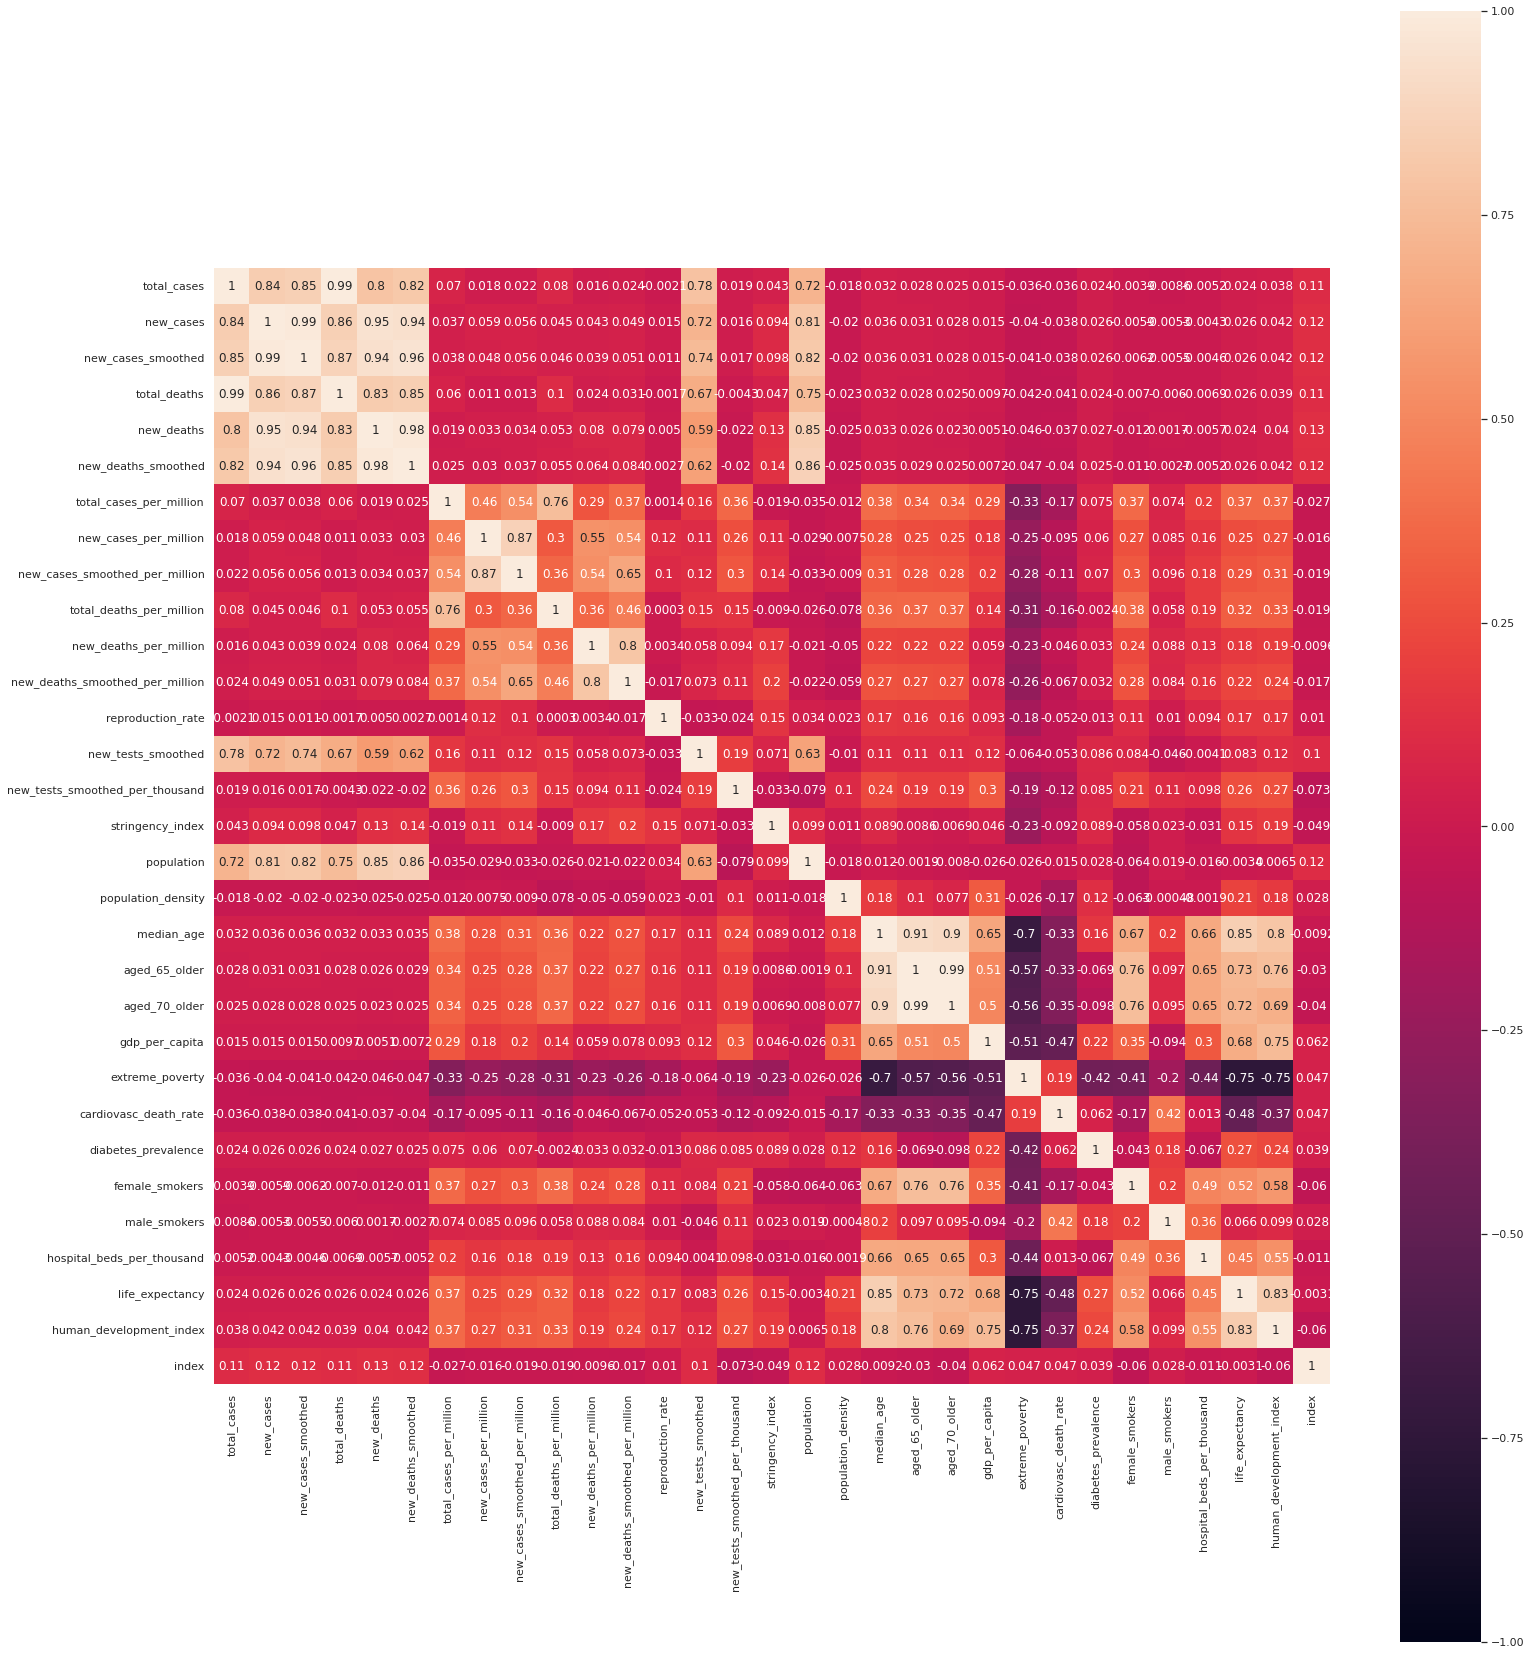

In [492]:
corr = data.corr()
f , ax = plt.subplots(figsize=(25,30))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,square=True,annot=True)
plt.show()

In [493]:
## replace new_cases value for missing value in new_cases_smoothed

In [494]:
indices = data['new_cases_smoothed'].isna()
indices = indices[indices].index

In [495]:
for index in indices:
  data.loc[index,'new_cases_smoothed'] = data['new_cases'].iloc[index]
print(len(indices),data['new_cases'].isna().sum())

110 0


In [496]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                        6132
new_deaths                          6135
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [497]:
## predict missing value in total_deaths

In [498]:
arr = [not x for x in list(data['total_deaths'].isna())]
print(arr)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [499]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data[arr][['total_cases', 'new_cases_smoothed']].values
y = data[arr]['total_deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# fit final model
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9868012866555768

In [500]:
arr = [x for x in list(data['total_deaths'].isna())]
x = data[arr][['total_cases', 'new_cases_smoothed']].values
y = model.predict(x)

In [501]:
indices = data[arr]['index'].values
count = 0
for index in indices:
  data.loc[index,'total_deaths'] = y[count]
  count = count +1
print(len(indices),data['total_deaths'].isna().sum())

6132 0


In [502]:
data['index'] = list(range(len(data)))
data.set_index(data['index'], inplace = True)

In [503]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                          6135
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [504]:
## predict missing value in new_deaths with new_cases and new_cases_smoothed

In [505]:
arr = [not x for x in list(data['new_deaths'].isna())]
print(arr)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

In [506]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data[arr][['new_cases', 'new_cases_smoothed']].values
y = data[arr]['new_deaths'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# fit final model
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8888062168585604

In [507]:
arr = [x for x in list(data['new_deaths'].isna())]
x = data[arr][['new_cases', 'new_cases_smoothed']].values
y = model.predict(x)

In [508]:
indices = data[arr]['index'].values
count = 0
for index in indices:
  data.loc[index,'new_deaths'] = y[count]
  count = count +1
print(len(indices),data['new_deaths'].isna().sum())

6135 0


In [509]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                  110
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [510]:
## replace new_deaths value for missing value in new_deaths_smoothed

In [511]:
indices = data['new_deaths_smoothed'].isna()
indices = indices[indices].index
for index in indices:
  data.loc[index,'new_deaths_smoothed'] = data['new_deaths'].iloc[index]
print(len(indices),data['new_deaths'].isna().sum())

110 0


In [512]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  3
new_cases_smoothed_per_million       110
total_deaths_per_million            6132
new_deaths_per_million              6135
new_deaths_smoothed_per_million      110
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older   

In [513]:
data.drop(columns=['total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million',
                   'new_deaths_smoothed_per_million'],inplace=True)

In [514]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
reproduction_rate                   8600
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older                       2107
gdp_per_capita                      3495
extreme_poverty                    36266
cardiovasc_death_rate               1457
diabetes_prevalence                 1322
female_smokers                     23723
male_smokers    

In [515]:
data['reproduction_rate'].describe()

count    103126.000000
mean          1.002221
std           0.338470
min           0.000000
25%           0.830000
50%           1.010000
75%           1.170000
max           6.000000
Name: reproduction_rate, dtype: float64

In [516]:
indices = data['reproduction_rate'].isna()
indices = indices[indices].index
data.loc[indices,'reproduction_rate'] = 1
print(len(indices),data['reproduction_rate'].isna().sum())

8600 0


In [517]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
reproduction_rate                      0
new_tests_smoothed                 44360
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older                       2107
gdp_per_capita                      3495
extreme_poverty                    36266
cardiovasc_death_rate               1457
diabetes_prevalence                 1322
female_smokers                     23723
male_smokers    

In [518]:
arr = [not x for x in list(data['new_tests_smoothed'].isna())]
print(arr)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [519]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data[arr][['total_cases', 'new_cases_smoothed']].values
y = data[arr]['new_tests_smoothed'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# fit final model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [520]:
model.score(x_test,y_test)

0.7026031282837295

In [521]:
arr = [x for x in list(data['new_tests_smoothed'].isna())]
x = data[arr][['total_cases', 'new_cases_smoothed']].values
y = model.predict(x)

In [522]:
indices = data[arr]['index'].values
count = 0
for index in indices:
  data.loc[index,'new_tests_smoothed'] = y[count]
  count = count +1

In [523]:
data['new_tests_smoothed'].isna().sum()

0

In [524]:
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 29 columns]

In [525]:
data.isna().sum()

iso_code                               0
continent                            664
location                               0
date                                   0
total_cases                            0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
reproduction_rate                      0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand    44360
stringency_index                    8494
population                             0
population_density                  1719
median_age                          1492
aged_65_older                       2661
aged_70_older                       2107
gdp_per_capita                      3495
extreme_poverty                    36266
cardiovasc_death_rate               1457
diabetes_prevalence                 1322
female_smokers                     23723
male_smokers    

In [526]:
arr = [not x for x in list(data['new_tests_smoothed_per_thousand'].isna())]
print(arr)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [527]:
x = data[arr][['human_development_index','new_tests_smoothed']].values
y = data[arr]['new_tests_smoothed_per_thousand'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# fit final model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [528]:
model.score(x_test,y_test)

0.0938822882071576

In [529]:
data.drop(columns='new_tests_smoothed_per_thousand',inplace=True)

In [530]:
data.isna().sum()

iso_code                          0
continent                       664
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                0
total_deaths                      0
new_deaths                        0
new_deaths_smoothed               0
reproduction_rate                 0
new_tests_smoothed                0
stringency_index               8494
population                        0
population_density             1719
median_age                     1492
aged_65_older                  2661
aged_70_older                  2107
gdp_per_capita                 3495
extreme_poverty               36266
cardiovasc_death_rate          1457
diabetes_prevalence            1322
female_smokers                23723
male_smokers                  24953
hospital_beds_per_thousand    12497
life_expectancy                 153
human_development_index           0
index                       

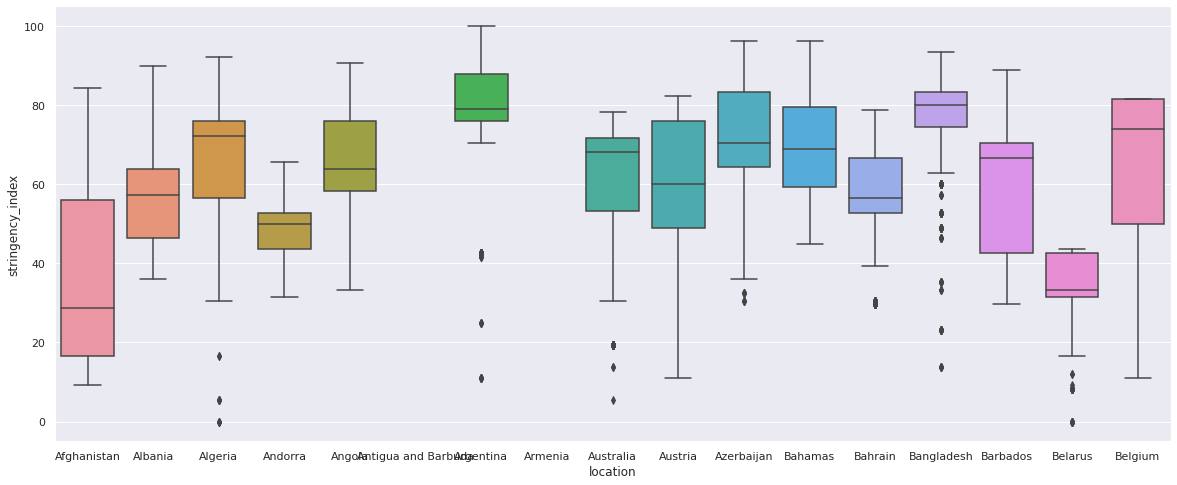

In [531]:
sb.set(rc = {'figure.figsize':(20,8)})
ax = sb.boxplot(x="location", y="stringency_index", data=data[["location",'stringency_index']][:10000])

In [532]:
arr = data['location'].unique()

In [533]:
for locate in arr:
  indices = data[data['location'] == locate]['stringency_index'].isna()
  indices = indices[indices].index
  data.loc[indices,'stringency_index'] = data[data['location'] ==locate]['stringency_index'].describe()[1]
print(data['stringency_index'].isna().sum())

7072


In [534]:
indices = data['stringency_index'].isna()
indices = indices[indices].index
data.loc[indices,'stringency_index'] = 0
print(data['stringency_index'].isna().sum())

0


In [535]:
data.isna().sum()

iso_code                          0
continent                       664
location                          0
date                              0
total_cases                       0
new_cases                         0
new_cases_smoothed                0
total_deaths                      0
new_deaths                        0
new_deaths_smoothed               0
reproduction_rate                 0
new_tests_smoothed                0
stringency_index                  0
population                        0
population_density             1719
median_age                     1492
aged_65_older                  2661
aged_70_older                  2107
gdp_per_capita                 3495
extreme_poverty               36266
cardiovasc_death_rate          1457
diabetes_prevalence            1322
female_smokers                23723
male_smokers                  24953
hospital_beds_per_thousand    12497
life_expectancy                 153
human_development_index           0
index                       

In [536]:
for col in data.columns :
  for locate in data['continent'].unique():
    indices = data[data['continent'] == locate][col].isna()
    indices = indices[indices].index
    data.loc[indices,col] = data[data['continent']==locate][col].describe()[1]

In [537]:
data.isna().sum()

iso_code                        0
continent                     664
location                        0
date                            0
total_cases                     0
new_cases                       0
new_cases_smoothed              0
total_deaths                    0
new_deaths                      0
new_deaths_smoothed             0
reproduction_rate               0
new_tests_smoothed              0
stringency_index                0
population                      0
population_density              0
median_age                      0
aged_65_older                   0
aged_70_older                   0
gdp_per_capita                  0
extreme_poverty                 0
cardiovasc_death_rate           0
diabetes_prevalence             0
female_smokers                  0
male_smokers                    0
hospital_beds_per_thousand      0
life_expectancy                 0
human_development_index         0
index                           0
dtype: int64

In [538]:
len(data)

111726

In [539]:
deletedata = pd.DataFrame()

In [540]:
arr = data['location'].unique()

In [541]:
for locate in arr:
  newdata = data[data['location']==locate]
  for col in newdata.columns :
    newdata = data[data['location']==locate]
    if newdata[col].dtype == 'int64' or newdata[col].dtype == 'float64':
      up = newdata[col].mean() + 3*newdata[col].std()
      low = newdata[col].mean() - 3*newdata[col].std()
      mask = (newdata[col] > up ) | (newdata[col] < low )
      deletedata = deletedata.append(newdata[mask],ignore_index=True)
      data = data.drop(newdata[mask]['index'].values)
    data['index'] = list(range(len(data)))
    data.set_index(data['index'], inplace = True)

In [542]:
len(data)

100799

In [543]:
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 28 columns]

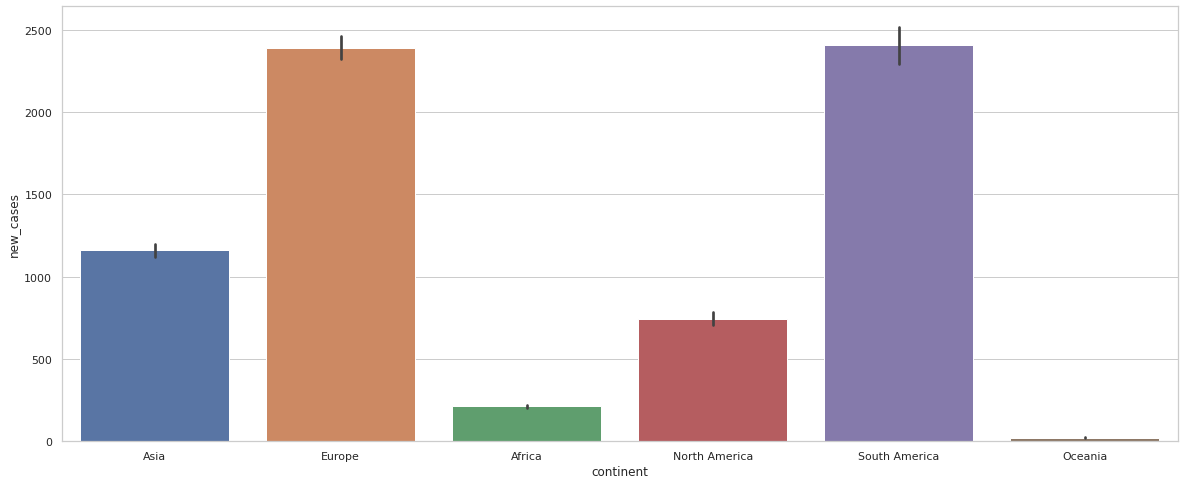

In [548]:
sb.set_theme(style="whitegrid")
tips = sb.load_dataset("tips")
ax = sb.barplot(x="continent", y="new_cases", data=data[data['population']<200000000])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


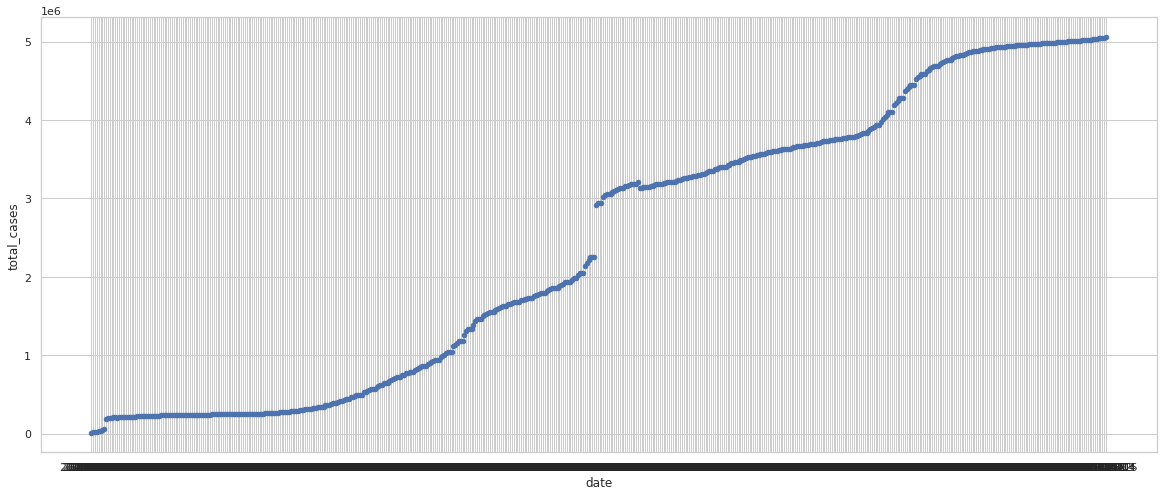

In [549]:
data[data['location']=='Spain'].plot.scatter(x = 'date', y = 'total_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


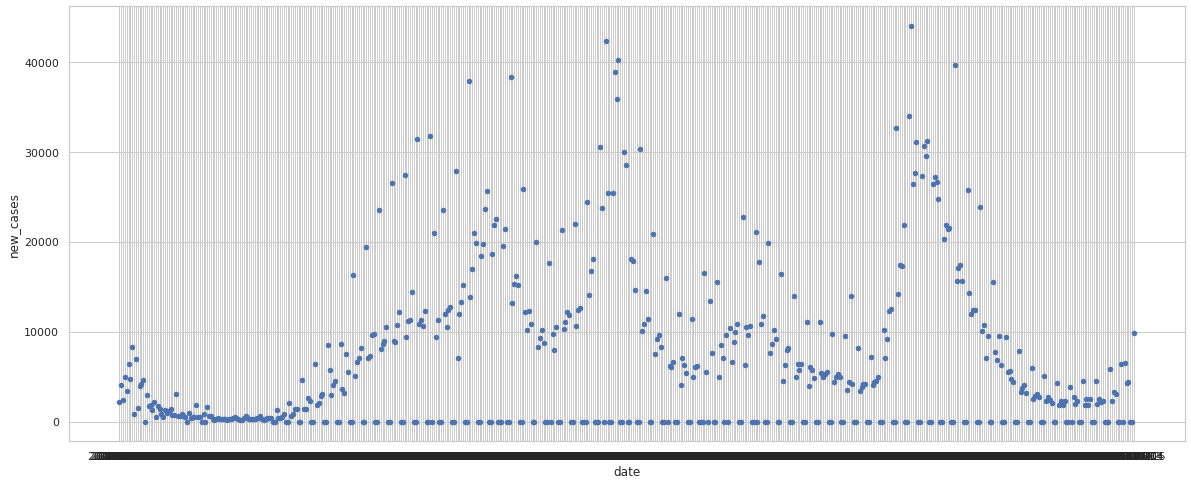

In [550]:
data[data['location']=='Spain'].plot.scatter(x = 'date', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


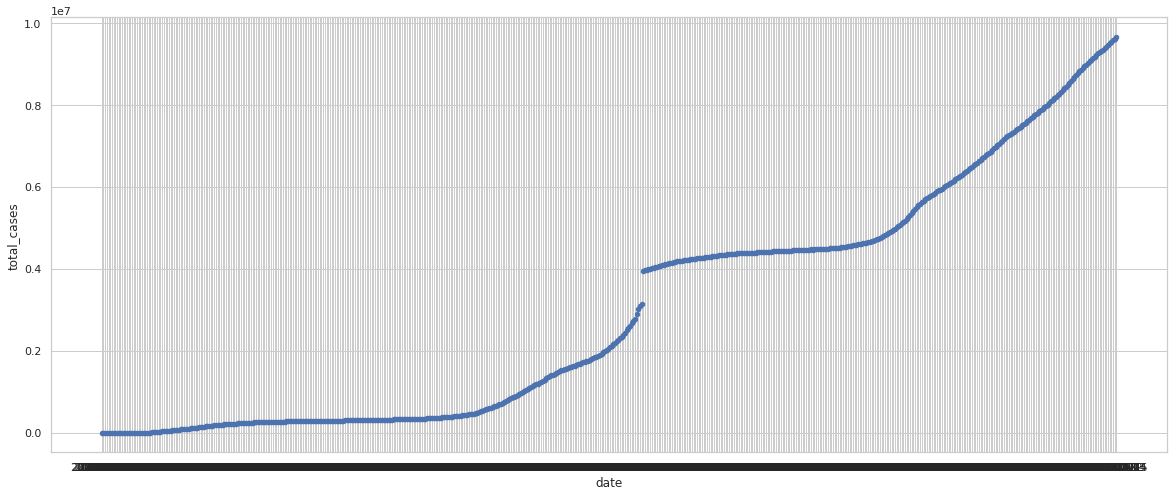

In [551]:
data[data['location']=='United Kingdom'].plot.scatter(x = 'date', y = 'total_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


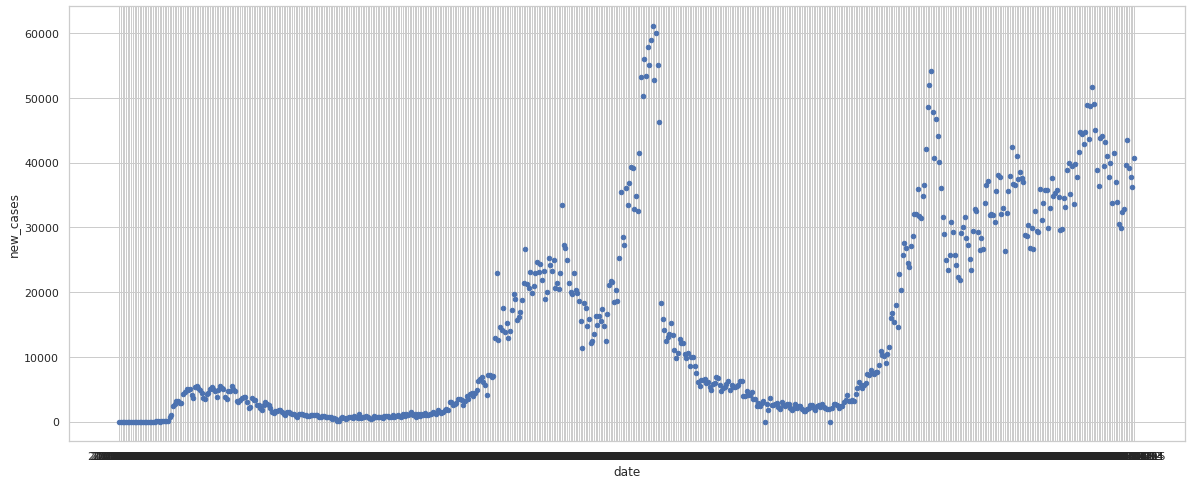

In [552]:
data[data['location']=='United Kingdom'].plot.scatter(x = 'date', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


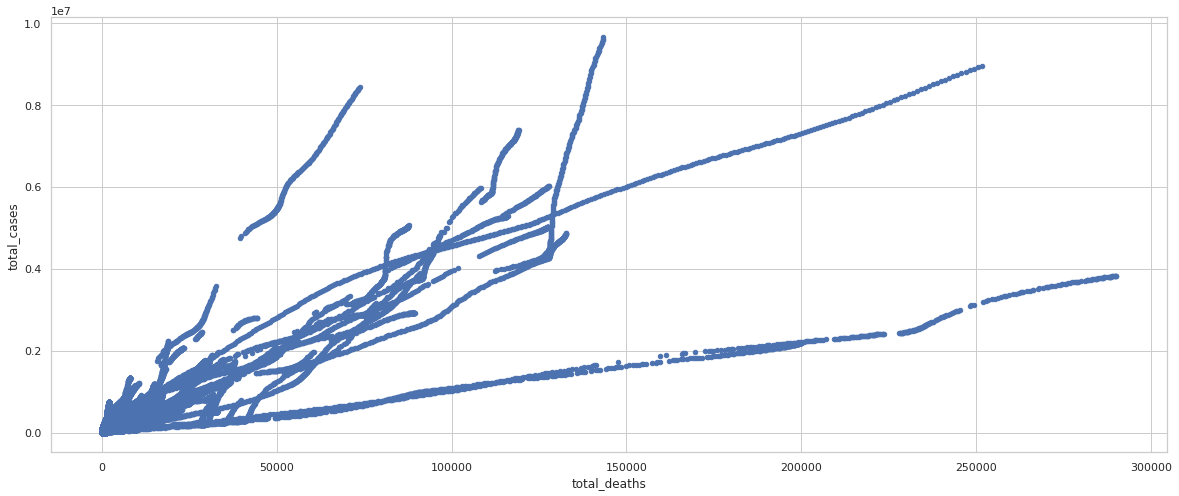

In [554]:
data[data['population']<200000000].plot.scatter(x = 'total_deaths', y = 'total_cases')
# plt.scatter(x=data[data['population']<200000000]['total_deaths'],y=data[data['population']<200000000]['total_cases'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


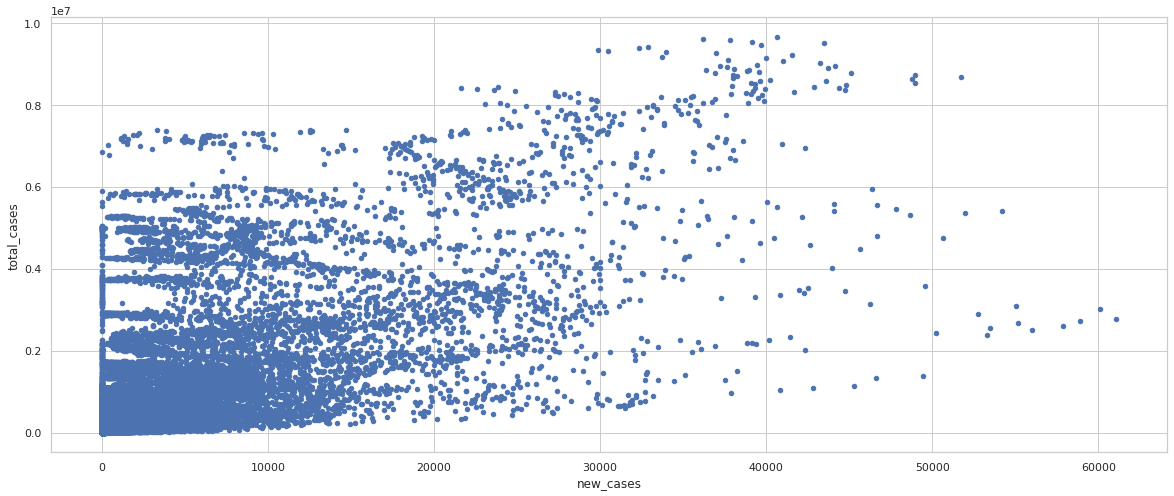

In [555]:
data[data['population']<200000000].plot.scatter(x = 'new_cases', y = 'total_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


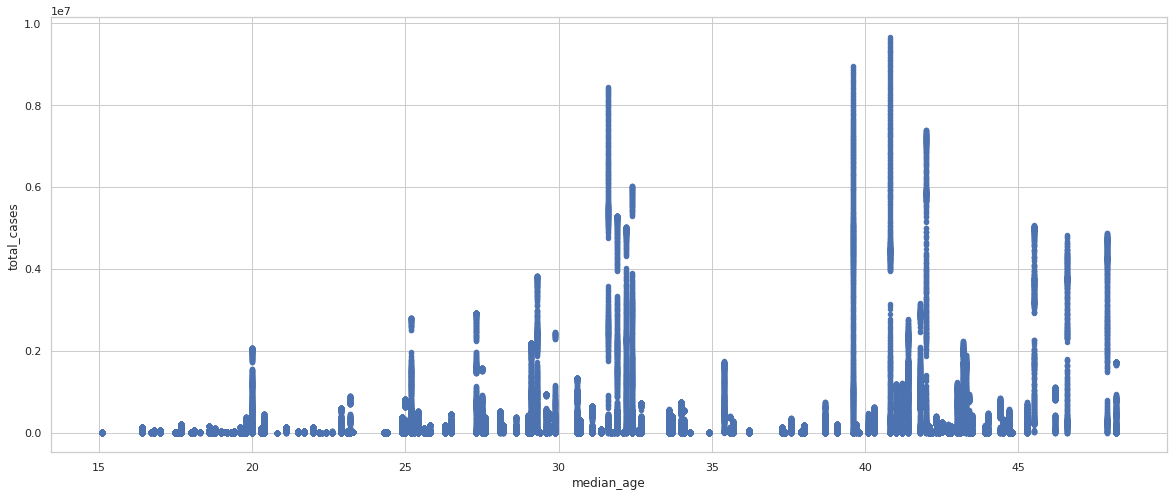

In [556]:
data[data['population']<200000000].plot.scatter(x = 'median_age', y = 'total_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


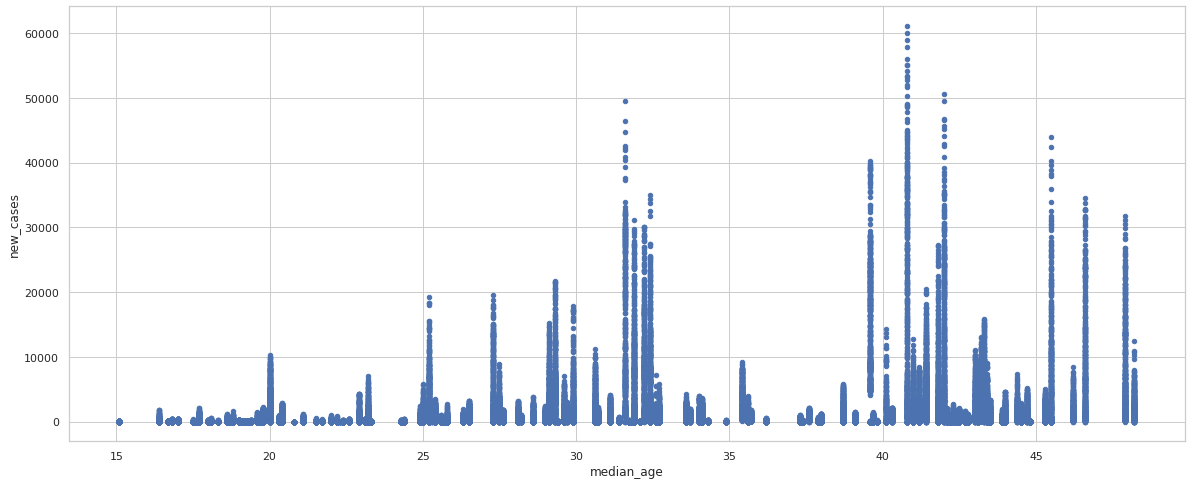

In [557]:
data[data['population']<200000000].plot.scatter(x = 'median_age', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


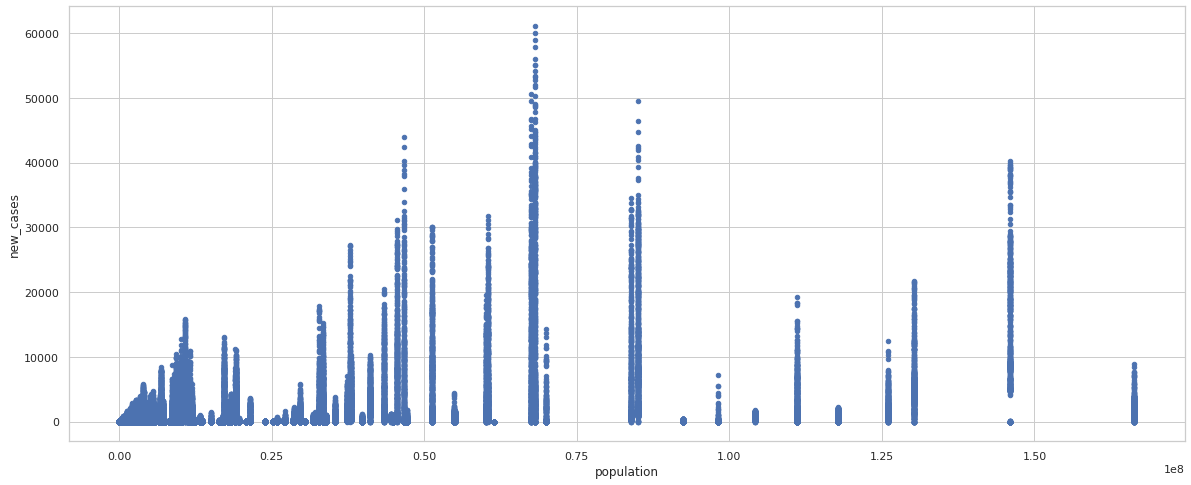

In [558]:
data[data['population']<200000000].plot.scatter(x = 'population', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


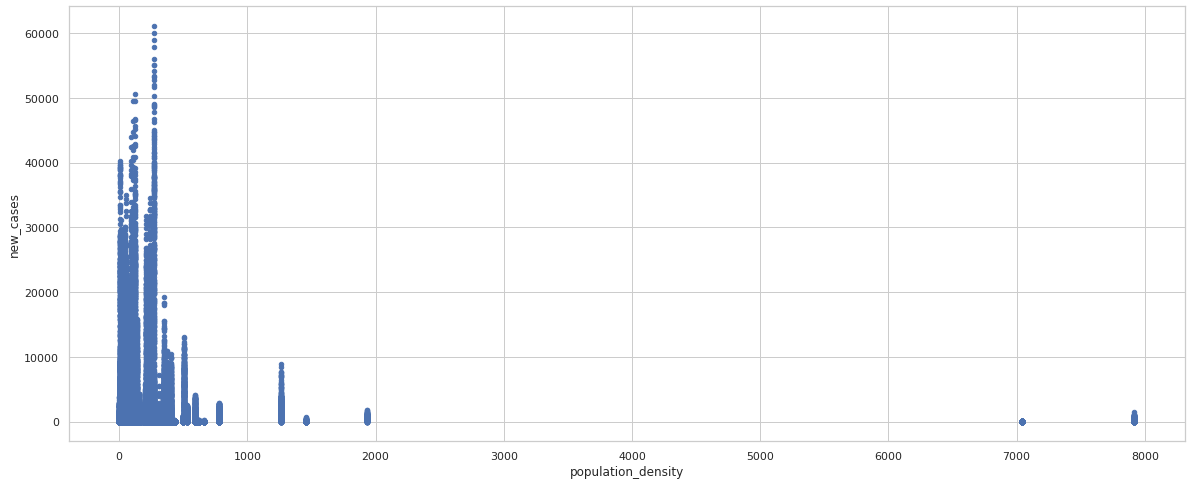

In [559]:
data[data['population']<200000000].plot.scatter(x = 'population_density', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


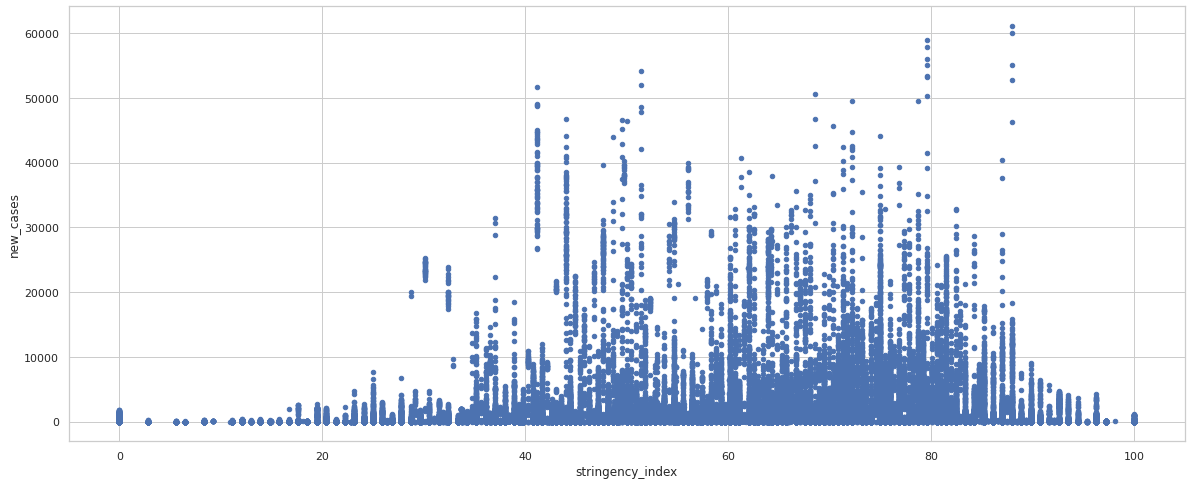

In [560]:
data[data['population']<200000000].plot.scatter(x = 'stringency_index', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


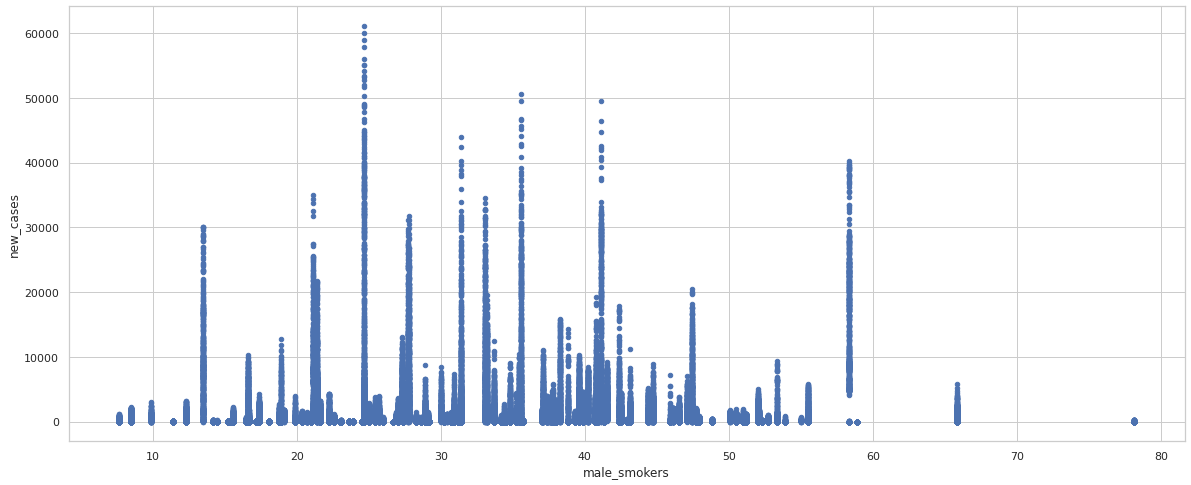

In [561]:
data[data['population']<200000000].plot.scatter(x = 'male_smokers', y = 'new_cases')

In [562]:
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 28 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


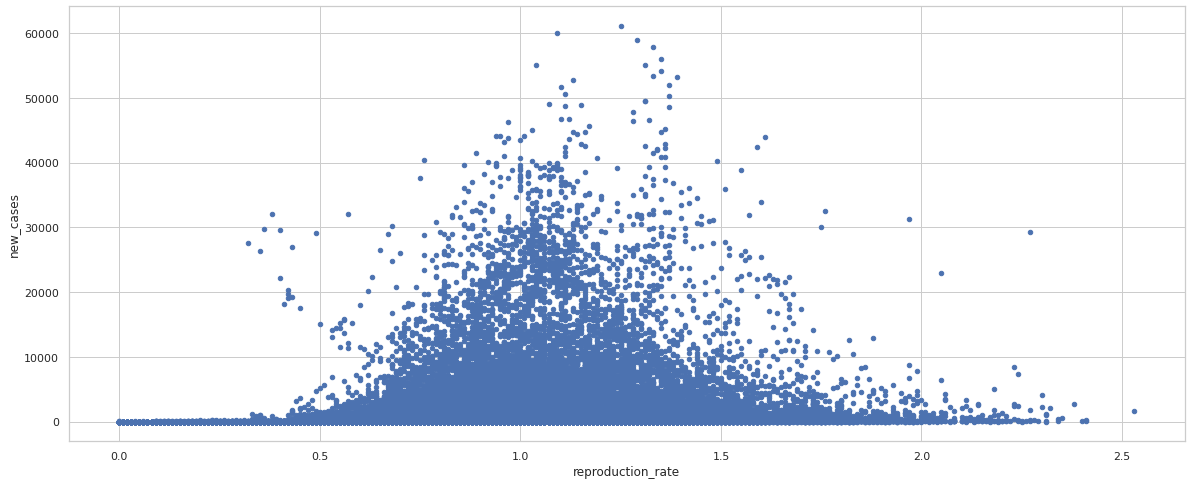

In [563]:
data[data['population']<200000000].plot.scatter(x = 'reproduction_rate', y = 'new_cases')

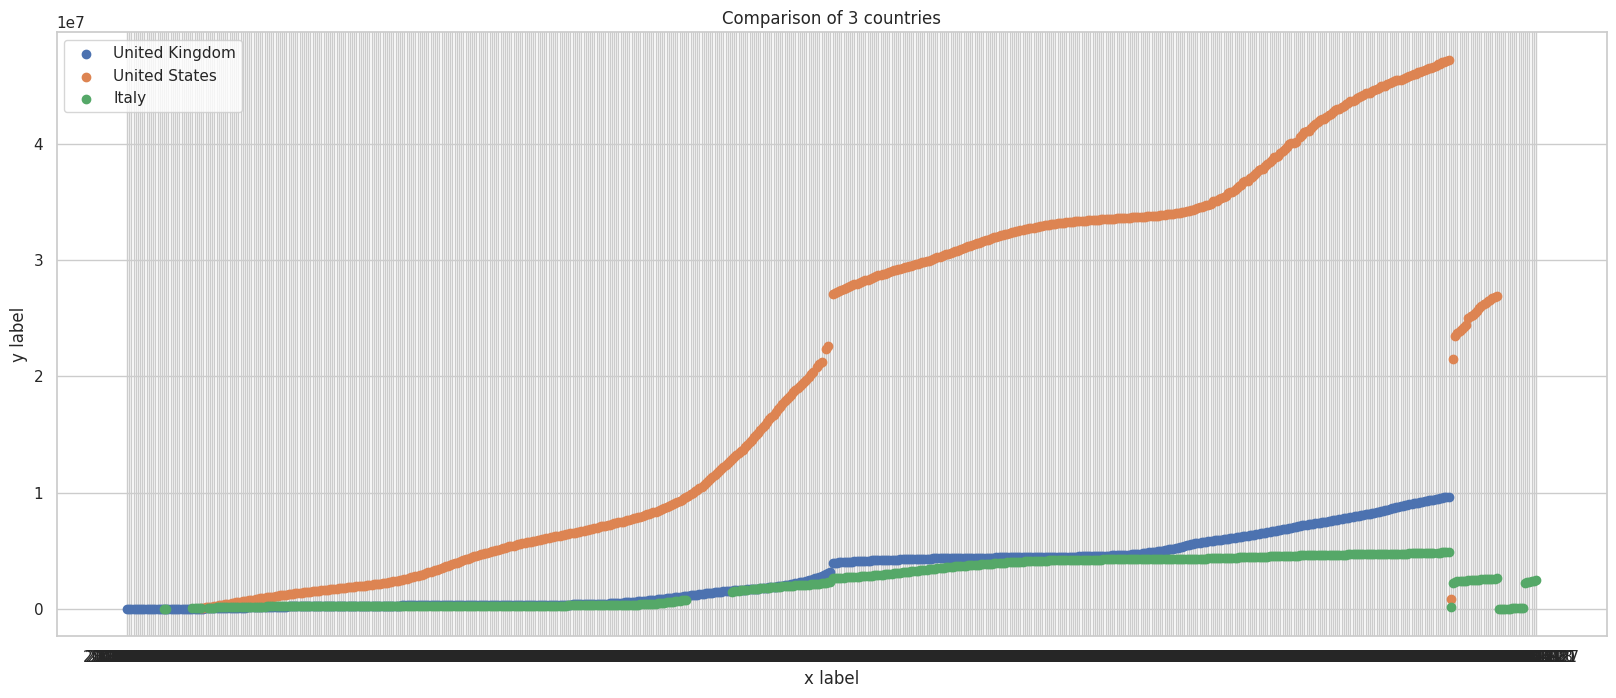

In [564]:
x = np.linspace(0, 2, 100)
plt.figure(figsize=(20, 8), dpi=100)
plt.scatter(data[data['location']=='United Kingdom']['date'], data[data['location']=='United Kingdom']['total_cases'], label='United Kingdom')
plt.scatter(data[data['location']=='United States']['date'], data[data['location']=='United States']['total_cases'], label='United States')
plt.scatter(data[data['location']=='Italy']['date'], data[data['location']=='Italy']['total_cases'], label='Italy')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Comparison of 3 countries")
plt.legend()

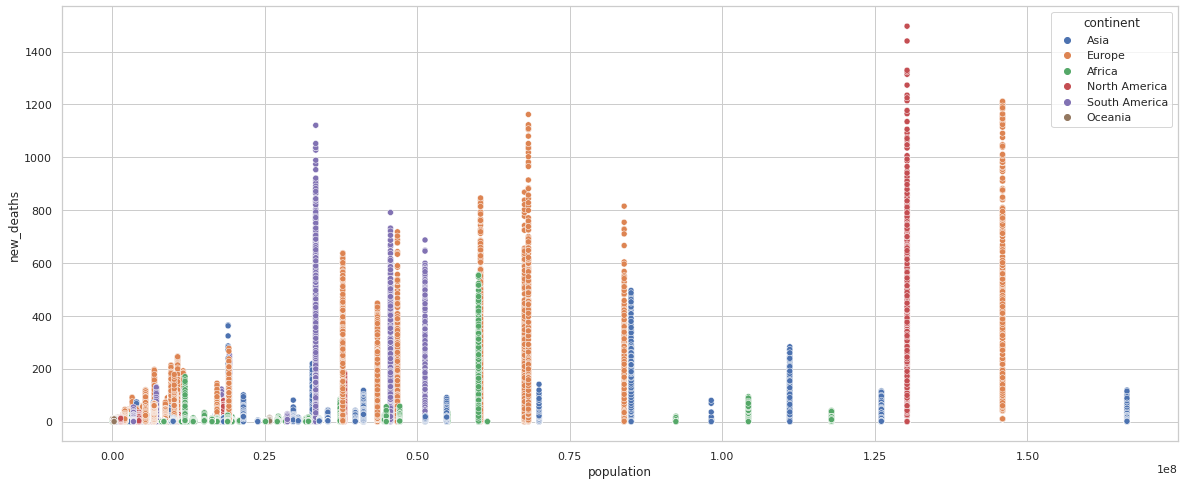

In [565]:
sb.scatterplot(data=data[data['population']<200000000], x="population", y="new_deaths", hue="continent")

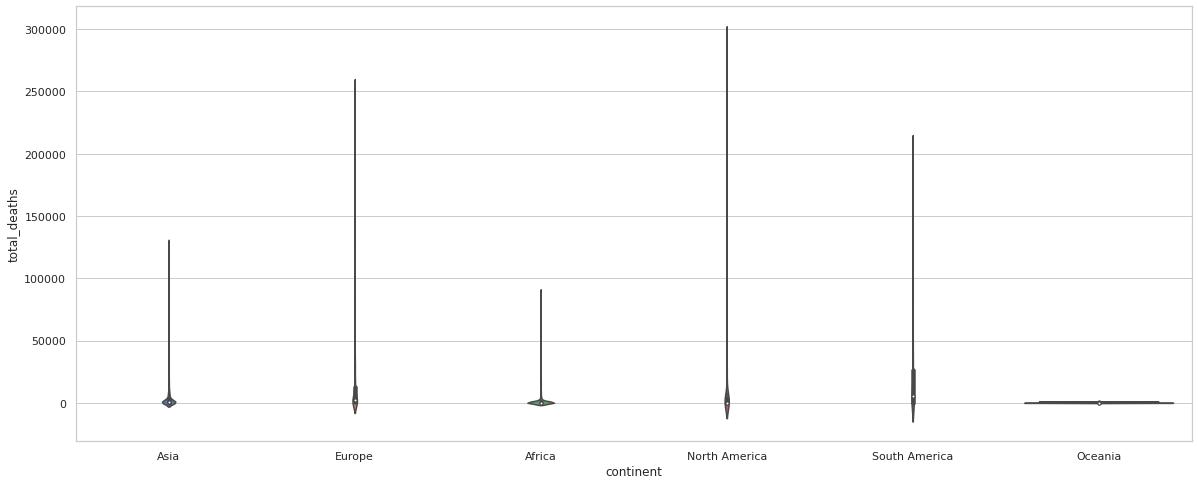

In [566]:
sb.violinplot(x='continent', y='total_deaths', data=data[data['population']<200000000])

In [568]:
arr = []
for cont in data[data['population']<200000000]['continent'].unique():
  arr.append(data[data['continent']==cont]['new_deaths'].sum())

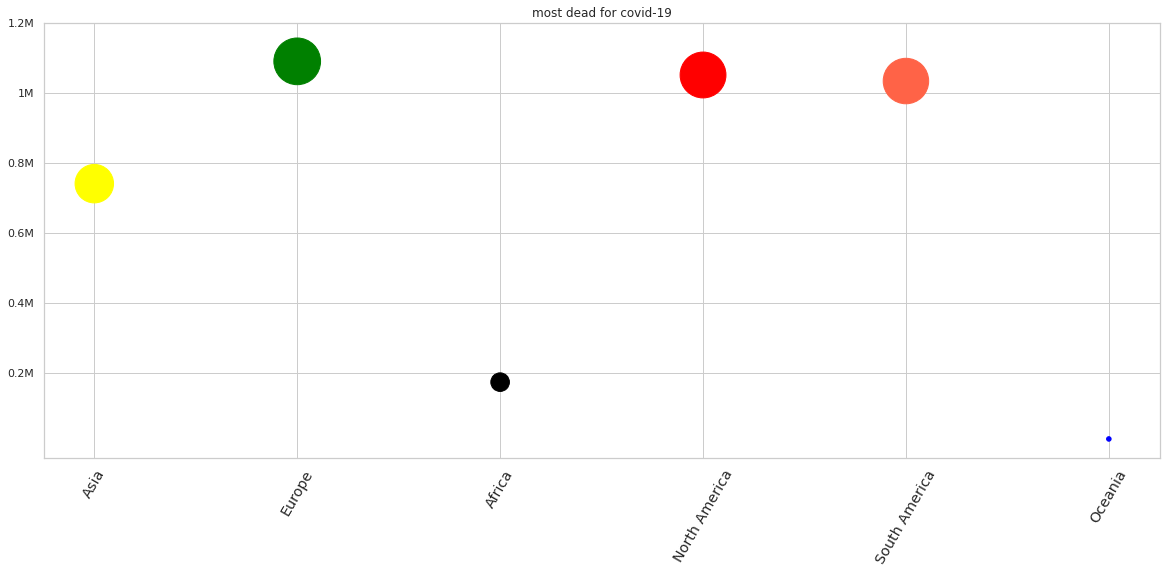

In [569]:
pop_size = np.array(arr)/500
Colors = ['yellow', 'green', 'black', 'red', 'tomato', 'blue']
plt.scatter(np.arange(6),arr, s=pop_size,c=Colors,alpha=1)
plt.xticks([0, 1, 2, 3, 4, 5],['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],rotation=60,fontsize='large')
plt.yticks([200000, 400000,600000,800000,1000000,1200000],['0.2M','0.4M','0.6M','0.8M','1M','1.2M'])
plt.title('most dead for covid-19')
plt.show()

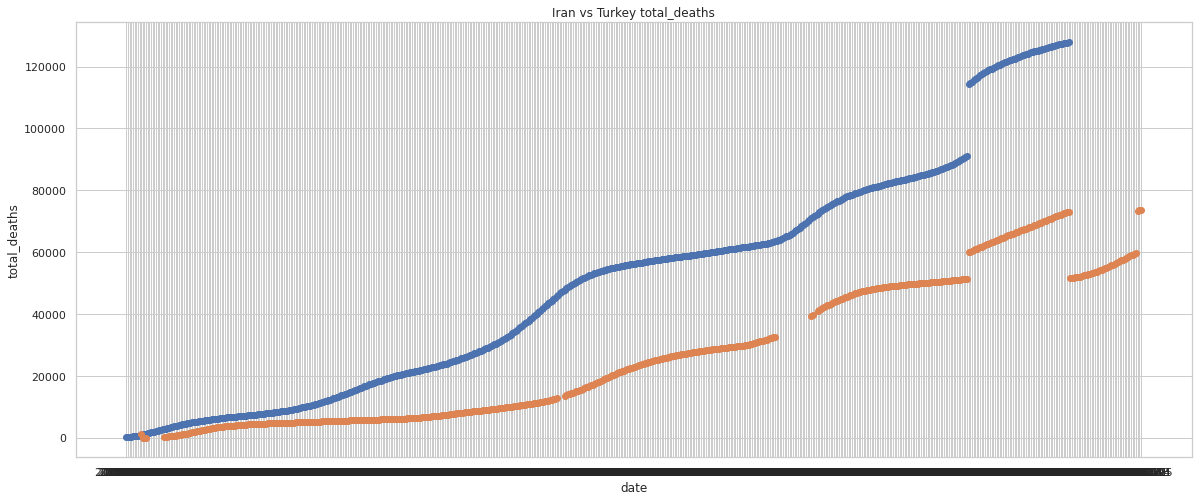

In [570]:
plt.scatter(data[data['location']=='Iran']['date'], data[data['location']=='Iran']['total_deaths'])
plt.scatter(data[data['location']=='Turkey']['date'], data[data['location']=='Turkey']['total_deaths'])
plt.title('Iran vs Turkey total_deaths')
plt.xlabel('date')
plt.ylabel('total_deaths')
# plt.yticks([20,30,40,50,60,70,80],['20M', '30M', '40M', '50M' ,'60M', '70M', '80M',])
# plt.legend(['iran','Turkey'],loc='best')
#plt.text(1980,40,'Iran–Iraq War',fontsize=15)
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


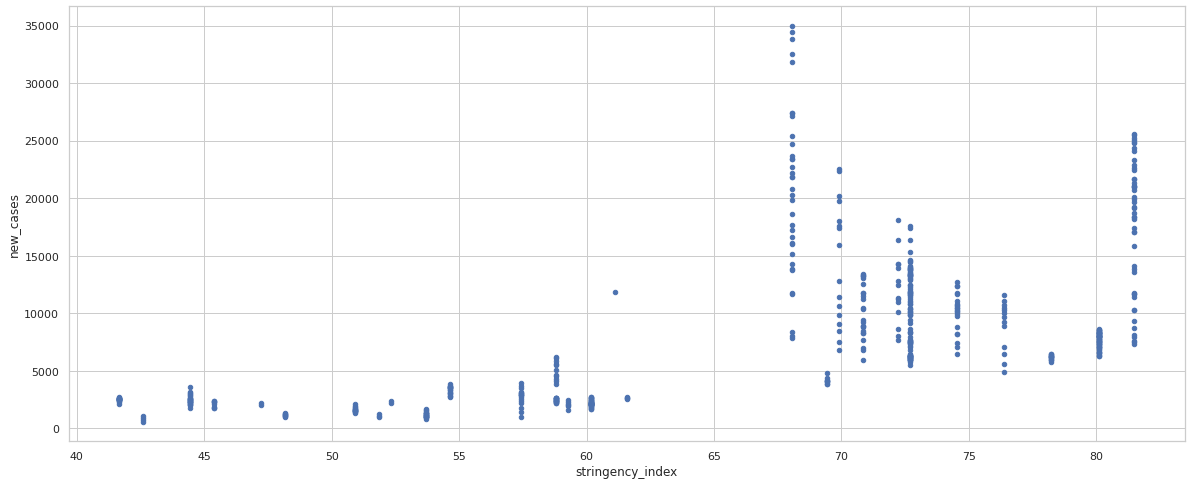

In [571]:
data[data['location']=='Iran'].plot.scatter(x = 'stringency_index', y = 'new_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


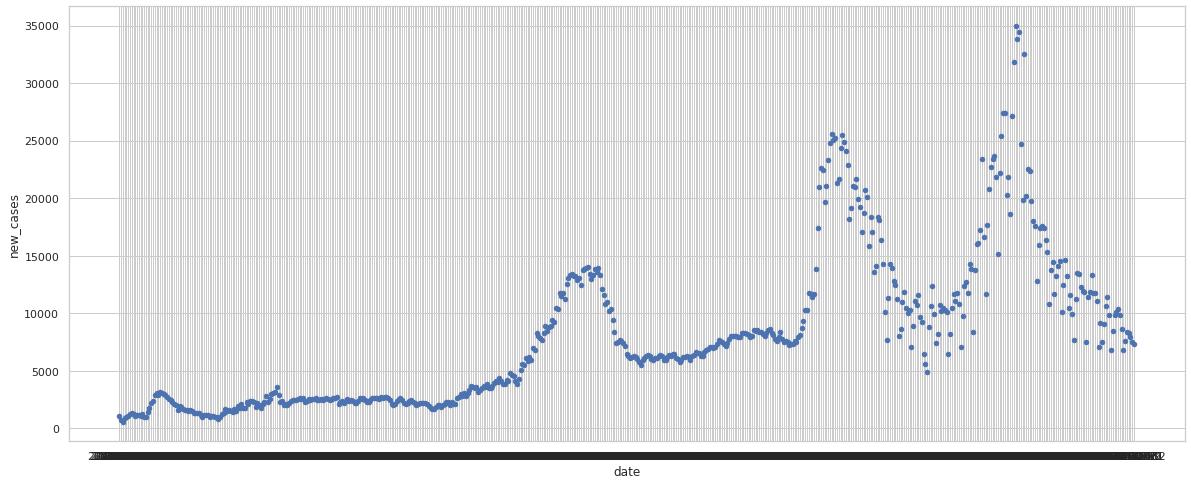

In [572]:
data[data['location']=='Iran'].plot.scatter(x = 'date', y = 'new_cases')

In [573]:
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 28 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


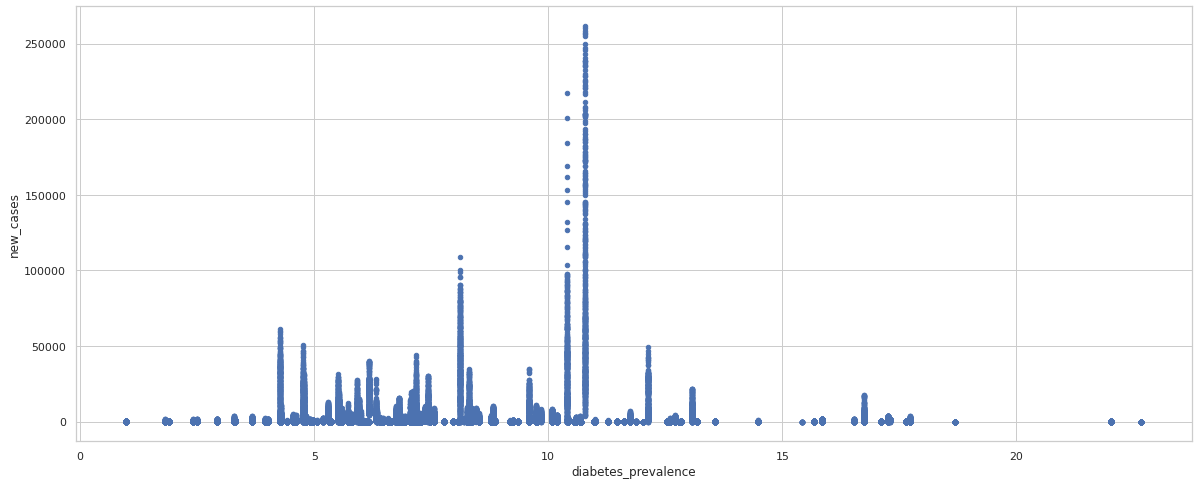

In [574]:
data[data['population']<2000000000].plot.scatter(x = 'diabetes_prevalence', y = 'new_cases')

In [575]:
data[data['continent']=='Asia']['new_cases'].mean()

1912.43642311057

In [576]:
data['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [577]:
arr = []
for cont in data['continent'].unique():
  arr.append(data[data['continent']==cont]['new_cases'].mean())

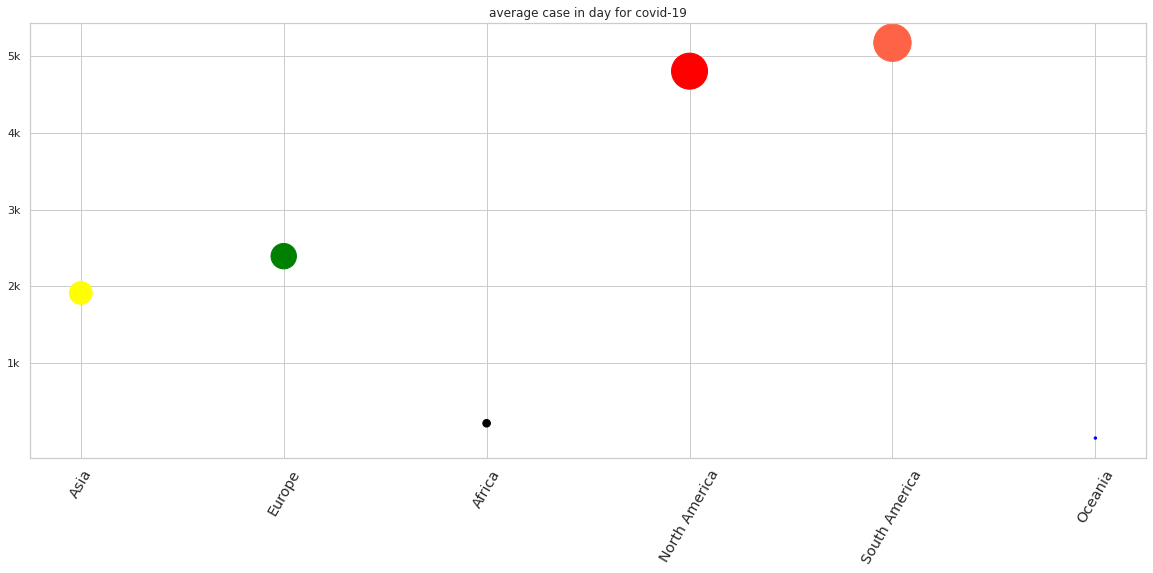

In [578]:
pop_size = np.array(arr[:6])/3.7
Colors = ['yellow', 'green', 'black', 'red', 'tomato', 'blue']
plt.scatter(np.arange(6),arr[:6], s=pop_size,c=Colors,alpha=1)
plt.xticks([0, 1, 2, 3, 4, 5],['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],rotation=60,fontsize='large')
plt.yticks([1000,2000,3000,4000,5000],['1k','2k','3k','4k','5k'])
plt.title('average case in day for covid-19')
plt.show()

In [579]:
arr = []
for cont in data['continent'].unique():
  arr.append(data[data['continent']==cont]['new_deaths'].mean())

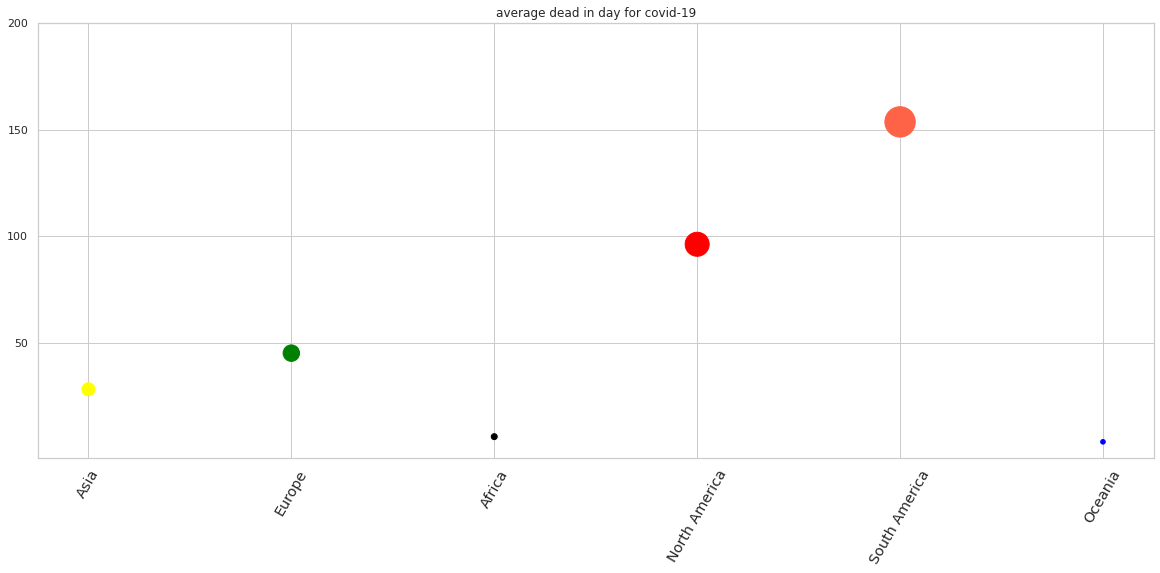

In [580]:
pop_size = np.array(arr[:6])*6
Colors = ['yellow', 'green', 'black', 'red', 'tomato', 'blue']
plt.scatter(np.arange(6),arr[:6], s=pop_size,c=Colors,alpha=1)
plt.xticks([0, 1, 2, 3, 4, 5],['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],rotation=60,fontsize='large')
plt.yticks([50,100,150,200])
plt.title('average dead in day for covid-19')
plt.show()

In [581]:
len(data[data['continent']=='Oceania']['location'].unique())

8

In [582]:
arr = []
for cont in data[data['continent']=='Oceania']['location'].unique():
  arr.append(data[data['location']==cont]['new_deaths'].mean())

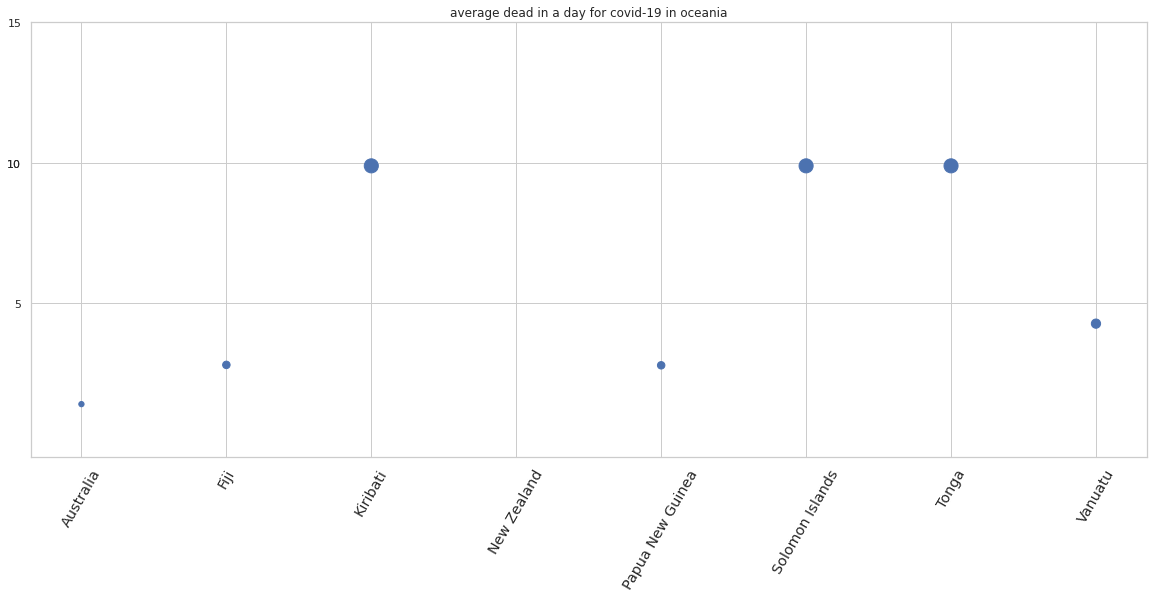

In [583]:
pop_size = np.array(arr)*20
plt.scatter(np.arange(8),arr, s=pop_size,alpha=1)
plt.xticks(np.arange(8),data[data['continent']=='Oceania']['location'].unique(),rotation=60,fontsize='large')
plt.yticks([5,10,10,15])
plt.title('average dead in a day for covid-19 in oceania')
plt.show()

In [584]:
data.head()

iso_code continent  ... human_development_index index
index                     ...                              
0          AFG      Asia  ...                   0.511     0
1          AFG      Asia  ...                   0.511     1
2          AFG      Asia  ...                   0.511     2
3          AFG      Asia  ...                   0.511     3
4          AFG      Asia  ...                   0.511     4

[5 rows x 28 columns]

In [585]:
indices = data[data['median_age']<18]['index'].values
data.loc[indices,'age'] = 'Adolescence'

In [586]:
indices = data[data['median_age']<40][data['median_age']>=18]['index'].values
data.loc[indices,'age'] = 'Adult'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [587]:
indices = data[data['median_age']<60][data['median_age']>=40]['index'].values
data.loc[indices,'age'] = 'Middle_Aged'

In [588]:
indices = data[data['median_age']>=60]['index'].values
data.loc[indices,'age'] = 'Old'

In [589]:
data['age'].unique()

array(['Adult', 'Middle_Aged', 'Adolescence'], dtype=object)

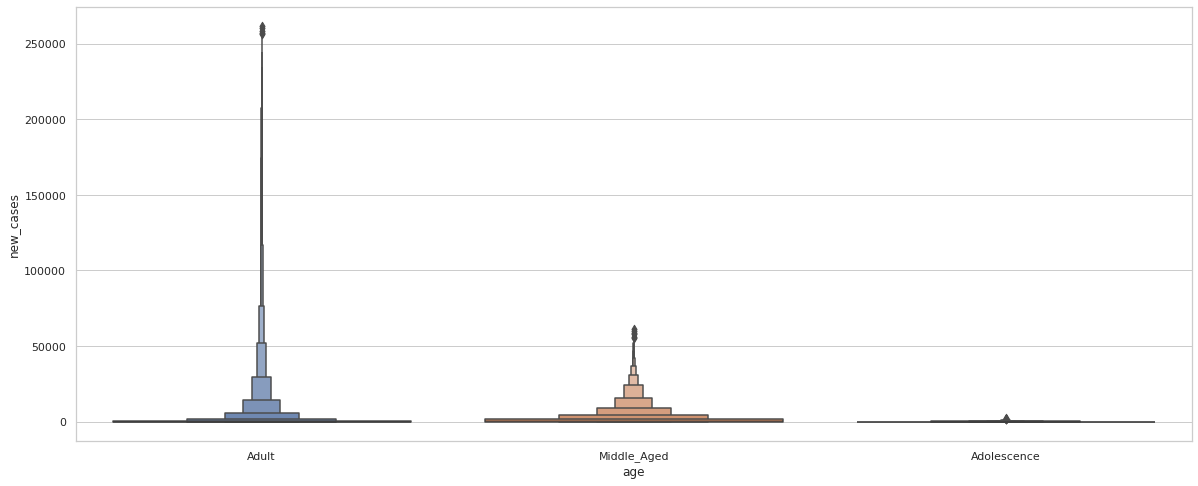

In [590]:
sb.boxenplot(x='age',y='new_cases',data=data[data['population']<2000000000])

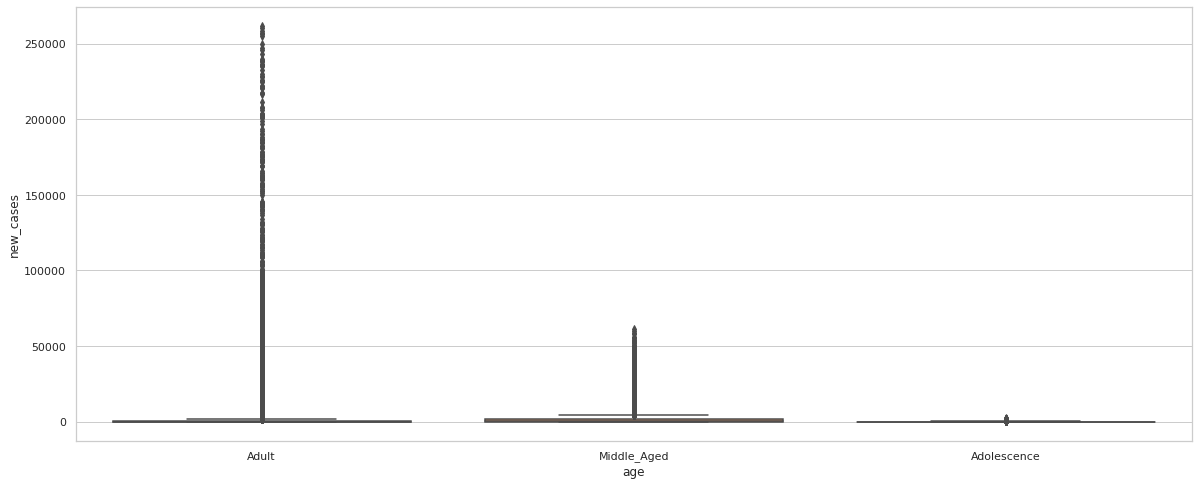

In [591]:
sb.boxplot(x='age',y='new_cases',data=data[data['population']<2000000000])

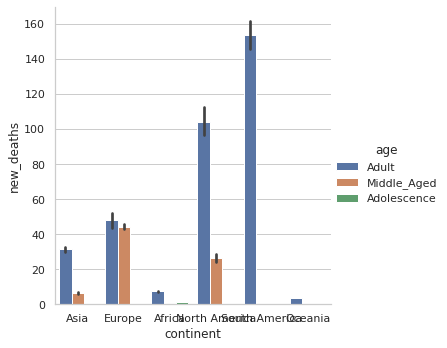

In [592]:
sb.catplot(x="continent", y="new_deaths", hue="age", kind="bar", data=data)

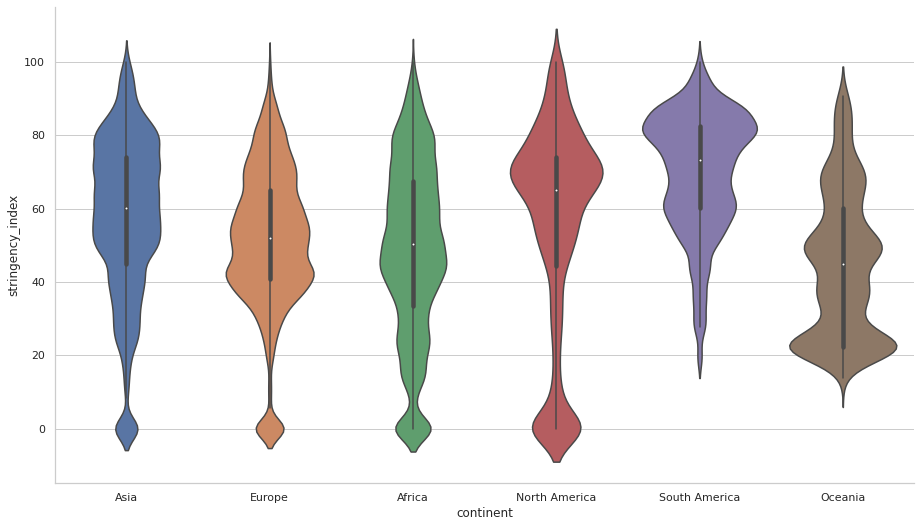

In [593]:
sb.catplot(x="continent", y="stringency_index",kind="violin", data=data)
plt.gcf().set_size_inches(15, 8)